## Distribus Normal

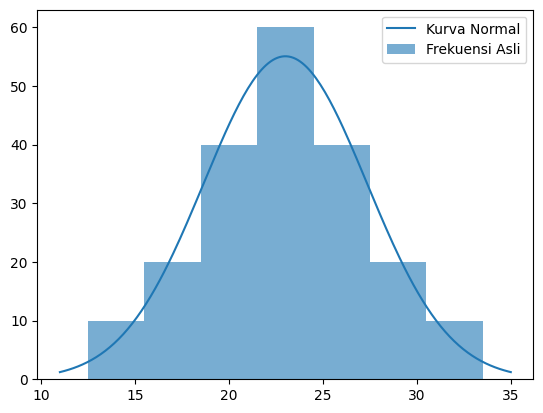

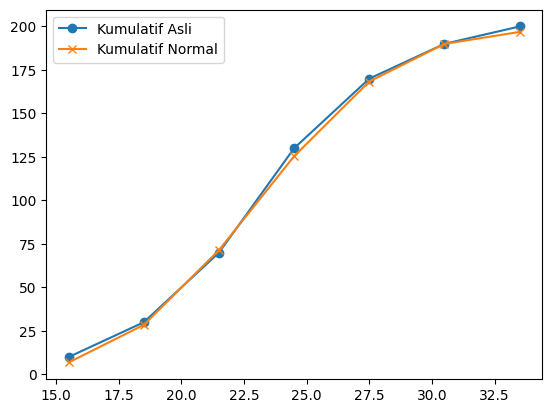

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data kelas & frekuensi
kelas = [(12.5,15.5),(15.5,18.5),(18.5,21.5),(21.5,24.5),(24.5,27.5),(27.5,30.5),(30.5,33.5)]
freq = np.array([10,20,40,60,40,20,10])

# median kelas
mid = np.array([(a+b)/2 for a,b in kelas])

# μ & σ
mu = np.average(mid, weights=freq)
sigma = np.sqrt(np.average((mid-mu)**2, weights=freq))

# Frekuensi normal teoretis: P(X in kelas i) * total
probs = norm.cdf([b for _,b in kelas], mu, sigma) - norm.cdf([a for a,_ in kelas], mu, sigma)
freq_norm = probs * freq.sum()

# istogram + Kurva Normal
plt.bar(mid, freq, width=3, alpha=0.6, label='Frekuensi Asli')
x = np.linspace(min(mid)-3, max(mid)+3, 200)
plt.plot(x, norm.pdf(x,mu,sigma)*freq.sum()*3, label='Kurva Normal')
plt.legend()
plt.show()

# Ogive (kumulatif)
cum_asli = np.cumsum(freq)
cum_norm = np.cumsum(freq_norm)
plt.plot([b for _,b in kelas], cum_asli, marker='o', label='Kumulatif Asli')
plt.plot([b for _,b in kelas], cum_norm, marker='x', label='Kumulatif Normal')
plt.legend()
plt.show()

